# Finding the optimal number of terms for $e^x$

In [165]:
import matplotlib.pyplot as plt
import math
import numpy as np

The approximation takes the form of:

$e(x) = ... +  \frac{x^i}{i!} + ... $ for $ i \in {1, ..., n} $ where $n$ equals the number of terms for the approximation.

### Upper bounds of n

The nominator and denominator are stored as single-precision floating point units. That means they can reach the maximal value

In [207]:
single_float_limit = 3.4 * 10 ** 38

The denonimator enforces an upper bound of 34 for n.

In [173]:
math.factorial(34) < single_float_limit

True

In [170]:
math.factorial(35) < single_float_limit

False

In [191]:
max_n(0), max_n(13), max_n(14)

(34, 34, 33)

The enumerator bounds $n$ only on $x$ > 13. Determine for each $x$ the maximal number of n such that $x^n < 3.4 * 10^{38}$

In [174]:
def max_n(x):
    n = 34
    while(x ** n > single_float_limit):
        n = n - 1
    return n    

### Upper bounds of x

In [175]:
math.exp(100)

2.6881171418161356e+43

In [209]:
x = 100
while math.exp(x) > single_float_limit:
    x = x - 1

x , math.exp(x)

(88, 1.6516362549940018e+38)

### Approximation

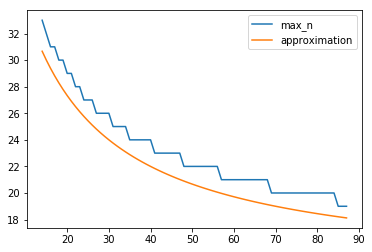

In [210]:
def approx(x):
    return 400/(x + 10) + 14

t = range(14, 88)
plt.plot(t, [max_n(x) for x in t], label='max_n')
plt.plot(t, [approx(x) for x in t], label='approximation')
plt.legend()

Test: the approximation should always be lower equal the actual value

In [205]:
correct = True
for x in range(14, 88):
    if approx(x) > max_n(x):
        correct = False
correct

True

Therefore the optimal number of terms can be approximated by the following:

$
\begin{equation}
|x| < 14 \rightarrow n = 34 \\
|x| >= 14 \rightarrow n = \frac{400}{x + 10} + 14
\end{equation}
$

In [225]:
def e_terms(x):
    if abs(x) < 14:
        return 34
    return 400 / (x + 10) + 14

In [226]:
e_terms(1)

34

## Calculating the factorial with integers

As 32-bit integers have a smaller maximal value than single-precision floating point. This puts a lower boundary on n.

In [214]:
max_int = 2147483647

In [216]:
n = 1
while(math.factorial(n) < max_int):
    n = n + 1
n

13

Maximum of n: 12

In [219]:
99999997952 > 10000000000

True